# House Price Predictions

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 2. Get Data

### California Data

In [10]:
from sklearn.datasets import fetch_california_housing

In [11]:
housing = fetch_california_housing()

data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['PRICE'] = housing.target

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### UK House Data

In [2]:
data = pd.read_csv('./Housing.csv')

data['PRICE'] = data['price']
data = data.drop('price', axis=1)

# Encode your data
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.head()

,area,bedrooms,bathrooms,stories,parking,PRICE,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,13300000,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,12250000,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,12250000,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,12215000,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,11410000,True,True,True,False,True,False,False,False


## 3. Split data for training and testing

In [12]:
x = data.drop('PRICE', axis=1)
y = data['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (16512, 8)
Testing data shape: (4128, 8)


## 4. Initialize and train model

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.5558915986952442
Root Mean Squared Error: 0.7455813830127763


## 5. Display Results

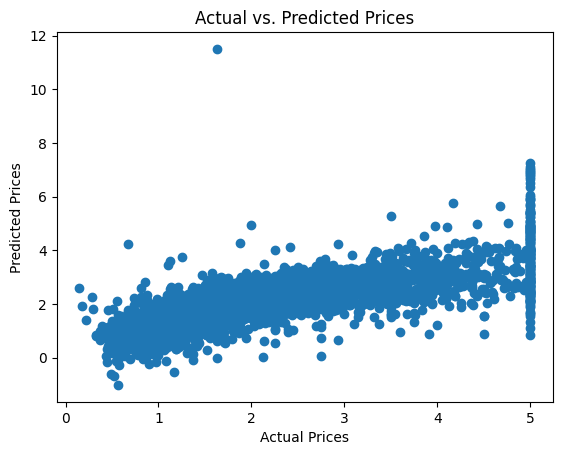

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

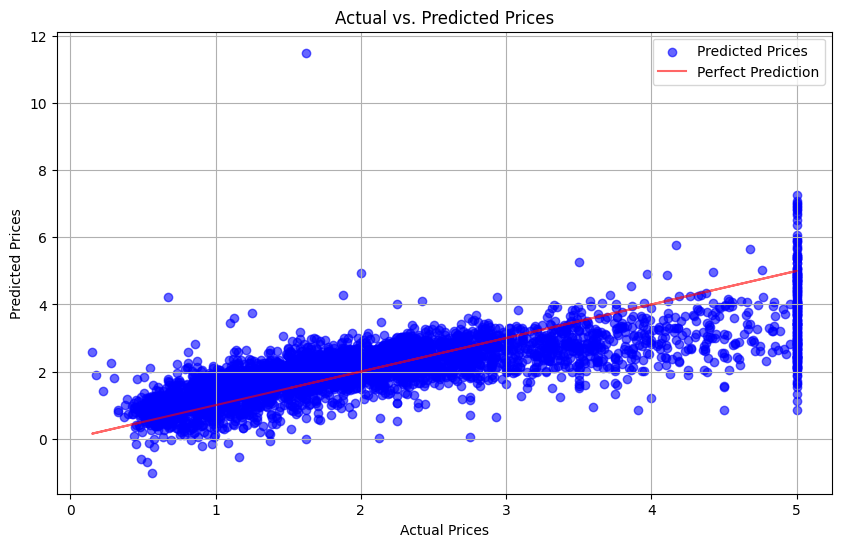

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Prices', alpha=0.6)
plt.plot(y_test, y_test, color='red', label='Perfect Prediction', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.grid()
plt.show()

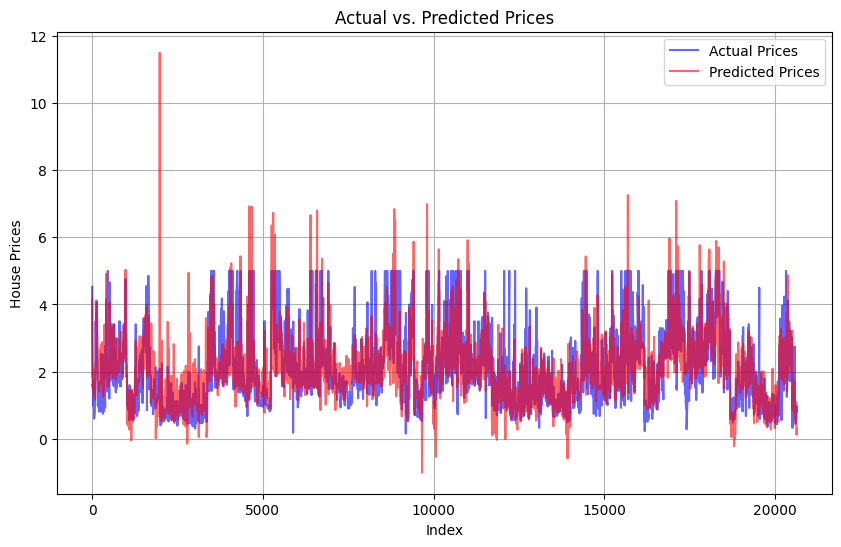

In [17]:
# Create a DataFrame for better visualisation
results = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})

# Sort by actual values for better line plotting
results.sort_index(inplace=True)

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual Prices'], color='blue', label='Actual Prices', alpha=0.6)
plt.plot(results.index, results['Predicted Prices'], color='red', label='Predicted Prices', alpha=0.6)
plt.xlabel("Index")
plt.ylabel("House Prices")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.grid()
plt.show()

In [9]:
# Create DataFrame for actual and predicted prices
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Sort by actual values for better line plotting
results_sorted = results.sort_values(by='Actual').reset_index(drop=True)

print(results_sorted)

       Actual     Predicted
0     1750000  2.678959e+06
1     1820000  3.417627e+06
2     1890000  2.730836e+06
3     1890000  2.755188e+06
4     2100000  2.920366e+06
..        ...           ...
104   9800000  7.498029e+06
105   9800000  8.143727e+06
106  10150000  9.617040e+06
107  12250000  7.555324e+06
108  13300000  7.968276e+06

[109 rows x 2 columns]
